<a href="https://colab.research.google.com/github/akbarjon2000/DataScience/blob/main/neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np

In [59]:
import matplotlib.pyplot as plt

In [60]:
x = np.arange(-5., 5., 0.1)

In [61]:
def step_function(x):
  return np.array(x>0, dtype = int)

In [62]:
step_function(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

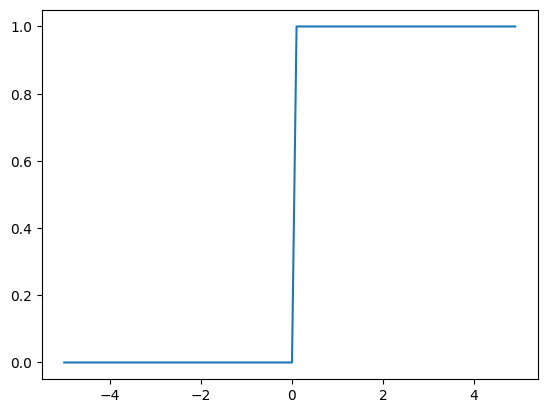

In [63]:
plt.plot(x, step_function(x))

In [64]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

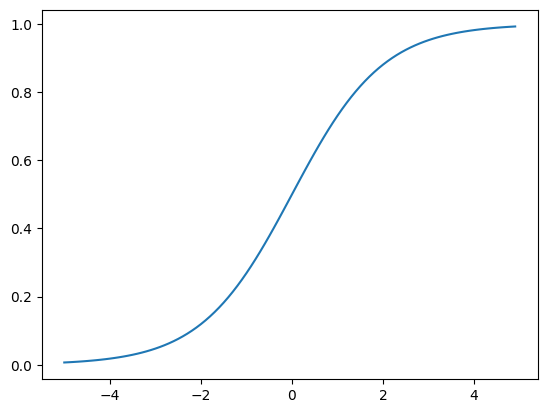

In [65]:
plt.plot(x, sigmoid(x))

In [66]:
def relu(x):
  return np.maximum(0, x)

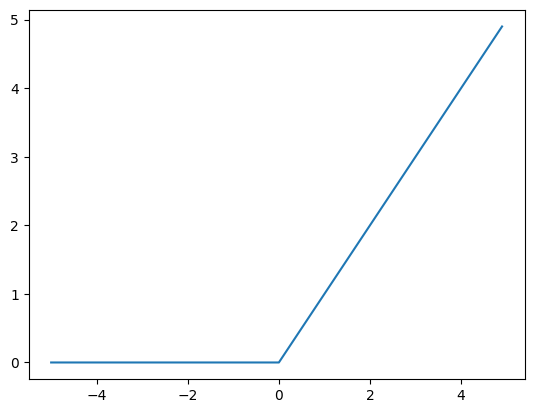

In [67]:
plt.plot(x, relu(x))

In [68]:
x = np.random.normal(size=(10, 2))

In [69]:
x

array([[ 0.7690579 , -0.06920613],
       [ 0.1331917 , -0.86592422],
       [ 0.56663103,  1.27278605],
       [-0.53221535,  0.91734236],
       [-0.47186956, -0.53020448],
       [-0.29690375,  1.31934835],
       [-0.53920775,  1.21352553],
       [-0.26913017,  0.3600342 ],
       [-1.98105531, -0.6931611 ],
       [ 0.66245853,  0.63777604]])

In [70]:
w1 = np.random.normal(size=(2, 3))
b1 = np.random.normal(size=(3, ))
h1 = np.dot(x, w1) + b1

In [71]:
h1

array([[ 0.28976571,  1.74164988,  0.29745038],
       [ 1.93076224,  2.29249466, -0.16261989],
       [-0.8632456 ,  0.13729775,  1.42651406],
       [ 0.90012708, -0.04998978,  1.44793636],
       [ 2.34371884,  1.59661727,  0.27400242],
       [ 0.18032423, -0.37337078,  1.70386168],
       [ 0.59797856, -0.38405803,  1.6866464 ],
       [ 1.15247507,  0.71137312,  0.92927317],
       [ 4.42410025,  0.97665153,  0.56340135],
       [-0.31771185,  0.89647487,  0.89224679]])

In [72]:
w2 = np.random.normal(size=(3, 2))
b2 = np.random.normal(size=(2, ))
h2 = np.dot(h1, w2) + b2

In [73]:
h2

array([[ 5.5849239 , -1.70597989],
       [10.51442313, -1.67696885],
       [ 1.99370315,  1.11519795],
       [ 7.20913025,  2.96527784],
       [11.6674493 ,  0.27829133],
       [ 5.03829529,  3.14340351],
       [ 6.27709764,  3.50299478],
       [ 8.0381102 ,  1.3902285 ],
       [17.77864633,  3.39237011],
       [ 3.69285719, -0.21983507]])

In [74]:
w3 = np.random.normal(size=(2,2))
b3 = np.random.normal(size=(2, ))
h3 = np.dot(h2, w3) + b3

In [75]:
h3

array([[ 0.01035233, -0.16960808],
       [ 1.02847717, -0.61157254],
       [ 2.55600307,  2.60606285],
       [ 5.73745411,  3.70909029],
       [ 3.52019274,  0.96711632],
       [ 5.50988939,  4.06852109],
       [ 6.17321319,  4.26158546],
       [ 4.08135102,  2.27085677],
       [ 8.34247623,  3.07645708],
       [ 1.35129912,  1.29259081]])

In [82]:
class dense:
  def __init__(self, input_size=2, output_size = 2, activation =True):
    self.input_size = input_size
    self.output_size = output_size
    self.activation = activation

    self.w = np.random.normal(size = (self.input_size, self.output_size))
    self.b = np.random.normal(size = (self.output_size,))
  
  def call(self, x):
    output = np.matmul(x, self.w) + self.b
    if self.activation:
      return relu(output)
    else:
      return output

In [78]:
dense.call(x)

array([[0.84907128, 0.        ],
       [0.25545834, 0.        ],
       [0.        , 1.11151675],
       [0.        , 1.21708313],
       [0.        , 0.        ],
       [0.        , 1.62002734],
       [0.        , 1.60746782],
       [0.        , 0.35294435],
       [0.        , 0.        ],
       [0.27158846, 0.23263056]])

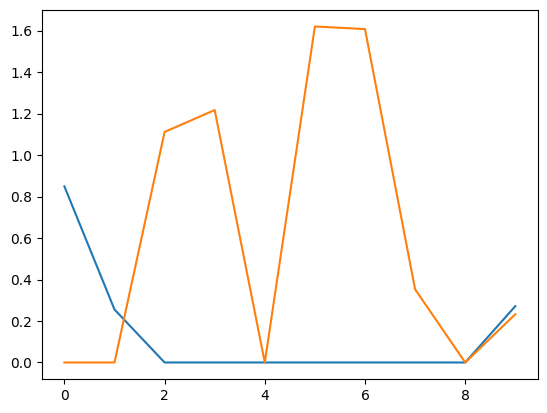

In [79]:
plt.plot(dense.call(x))

In [80]:
class NN:
  def __init__(self):
    self.layer1 = dense(2, 3)
    self.layer2 = dense(3, 2)
    self.layer3 = dense(2, 2)
  def forward(self, x):
    out = self.layer1.call(x)
    out = self.layer2.call(out)
    out = self.layer3.call(out)
    return out

In [84]:
model = NN()

In [85]:
model.forward(x)

array([[1.73789284, 0.79907752],
       [1.73789284, 0.79907752],
       [1.70928703, 0.69489839],
       [1.66871373, 0.547135  ],
       [1.73789284, 0.79907752],
       [1.54939648, 0.11259498],
       [1.55122976, 0.11927156],
       [1.73789284, 0.79907752],
       [1.73789284, 0.79907752],
       [1.73789284, 0.79907752]])

In [91]:
def mean_squared_error(y, y_pred):
  return np.mean(np.square(y-y_pred))

In [92]:
y = np.array([1, 2, 3, 4])

In [93]:
y_pred = np.array([0.98, 1.95, 3.04 , 4.1])

In [94]:
mean_squared_error(y, y_pred)

0.003624999999999984